In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib notebook

In [2]:
datadir = "../data/"
filename = "3200_lc_49627_to_49787.txt"

In [3]:
data = pd.read_csv(datadir+filename, delimiter=' ',
                     header=None, names=['time','flux'], dtype={'time':float, 'flux':float})


time = np.array(data.time)
flux = np.array(data.flux)
flux_err = np.ones_like(flux) * np.std(flux)/10.0
data_pts = len(time)

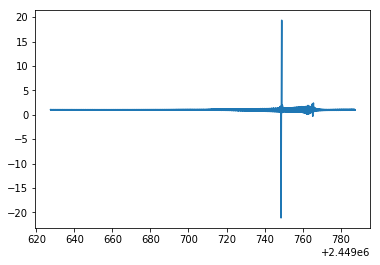

In [4]:
plt.plot(time,flux)

In [5]:
npoints = 100
idx = np.random.choice(np.arange(0, time.shape[0], 1, dtype=int),size=npoints, replace=False)

tsmall = time[np.sort(idx)]
fsmall = flux[np.sort(idx)]
if flux_err is not None:
    ferrsmall = flux_err[np.sort(idx)]
else:
    ferrsmall = np.zeros_like(fsmall) + sigma

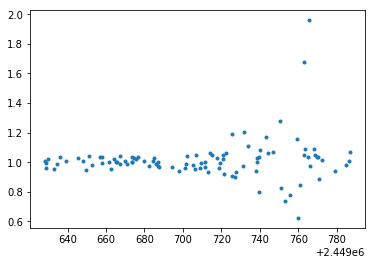

In [6]:
plt.plot(tsmall, fsmall, '.')

In [5]:
time = np.array(data.time)
print(time)
flux = np.array(data.flux)
flux_err = np.ones_like(flux) * np.std(flux)/10.0

cap = 60000
time = time[:cap:]
flux = flux[:cap:]

[ 2449627.49049528  2449627.49049528  2449627.49084252 ...,
  2449787.48942442  2449787.48977158  2449787.49011874]


In [5]:
p0

array([ 2.        ,  2.1010101 ,  2.2020202 ,  2.3030303 ,  2.4040404 ,
        2.50505051,  2.60606061,  2.70707071,  2.80808081,  2.90909091,
        3.01010101,  3.11111111,  3.21212121,  3.31313131,  3.41414141,
        3.51515152,  3.61616162,  3.71717172,  3.81818182,  3.91919192,
        4.02020202,  4.12121212,  4.22222222,  4.32323232,  4.42424242,
        4.52525253,  4.62626263,  4.72727273,  4.82828283,  4.92929293,
        5.03030303,  5.13131313,  5.23232323,  5.33333333,  5.43434343,
        5.53535354,  5.63636364,  5.73737374,  5.83838384,  5.93939394,
        6.04040404,  6.14141414,  6.24242424,  6.34343434,  6.44444444,
        6.54545455,  6.64646465,  6.74747475,  6.84848485,  6.94949495,
        7.05050505,  7.15151515,  7.25252525,  7.35353535,  7.45454545,
        7.55555556,  7.65656566,  7.75757576,  7.85858586,  7.95959596,
        8.06060606,  8.16161616,  8.26262626,  8.36363636,  8.46464646,
        8.56565657,  8.66666667,  8.76767677,  8.86868687,  8.96

In [6]:
###dense###
time_unit="days"
night_length=8.0


if time_unit == "days":
            night_length /= 24.0
            tseg = time[-1] - time[0] # total length of the time series
else:
    tseg = (time[-1] - time[0]) / 24.0
    
print('tseg = ' + str(tseg))

tstart = time[0]
print(tstart)
tend = tstart + night_length

tsmall = []
fsmall = []

ferrsmall = []

# one minute in fractions of days
dt = 1./(60*24.)


while tend <= time[-1]:

    #within the 8-hour night
    while tstart <= tend:
        tind = time.searchsorted(tstart)
        tsmall.append(time[tind])
        fsmall.append(flux[tind])
        
        if flux_err is not None:
            ferrsmall.append(flux_err[tind])
        else:
            ferrsmall.append(sigma)
            
        tstart += 5.*dt
        
    if time_unit == "days":
        tstart += (1.0-night_length)
        tend += 1.0
    elif time_unit == "hours":
        tstart += (24.0 - night_length)
        tend += 24.0

tseg = 20.8337155702
2449627.4905


In [8]:
###semi-dense###
#semi-dense : 15 obervations per night every 10-60 minutes (30 minutes on average) 
#irregular for 8 hours, 1 night, and then 3 nights later per month (potentially for 6 months) 

time_unit="days"
night_length=8.0

if time_unit == "days":
            night_length /= 24.0
            tseg = time[-1] - time[0] # total length of the time series
else:
    tseg = (time[-1] - time[0]) / 24.0
    
print(tseg)

tstart = time[0]
tend = tstart + night_length

tsmall = []
fsmall = []

ferrsmall = []

# one minute in fractions of days
dt = 1./(60*24.)

skip_month = False
while tend <= time[-1]:

    #within 15 obeservations
    nobs = 0
    while nobs < 15:
        #generate 15 observations per night
        total_time = 999
        while total_time > 8.0:
            start_id = np.random.normal(30, 10, size=15)
            total_time = start_id.sum()/60.
            
        for j in range(15):
            tind = time.searchsorted(tstart)
            tsmall.append(time[tind])
            fsmall.append(flux[tind])

            if flux_err is not None:
                ferrsmall.append(flux_err[tind])
            else:
                ferrsmall.append(sigma)

            tstart += start_id[j]*dt
            
            nobs+=1
            
        night_length = start_id.sum()/60.
        
    if skip_month==False:
        if time_unit == "days":
            tstart += (3.0-night_length/24.)
            tend += 3.0

        elif time_unit == "hours":
            tstart += (72.0 - night_length)
            tend += 72.0
            
    else:
        if time_unit == "days":
            tstart += (26.0-night_length/24.)
            tend += 26.0

        elif time_unit == "hours":
            tstart += (24.0*26. - night_length)
            tend += 24.0*26.
        
    skip_month = not skip_month

20.8337155702


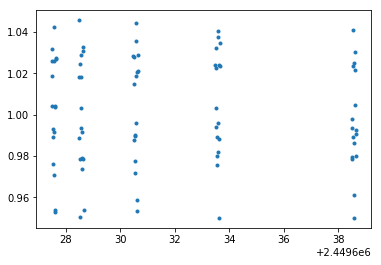

In [11]:
plt.plot(tsmall, fsmall, '.')
plt.show()

In [139]:
days_total = 999
while days_total > 14:
    day_jump= np.random.randint(1,6, size=4)
    days_total = day_jump.sum()
    print(day_jump.sum())
    print(day_jump)

15
[3 4 5 3]
18
[5 4 4 5]
8
[1 4 1 2]


In [10]:
###TALC : 17 observations per night every 15 minutes on average (randomize) for 5 nights 
###over a 2 week period (TALC Masiero et al. 2009)

time_unit="days"
night_length=8.0

if time_unit == "days":
            night_length /= 24.0
            tseg = time[-1] - time[0] # total length of the time series
else:
    tseg = (time[-1] - time[0]) / 24.0
    
print(tseg)

tstart = time[0]
tend = tstart + night_length

tsmall = []
fsmall = []

ferrsmall = []

# one minute in fractions of days
dt = 1./(60*24.)

days_total = 999
while days_total > 14:
    day_jump= np.random.randint(1,6, size=4)
    print(type(day_jump))
    days_total = day_jump.sum()
    day_jump = np.append(day_jump, [0])
    print(day_jump.sum())
    print(day_jump)

day_obs = 0 
while day_obs < 5:
    #within 17 obeservations
    nobs = 0
    while nobs < 17:
        #generate 17 observations per night
        start_id = np.random.normal(15, 3, size=17)
            
        for j in range(17):
            tind = time.searchsorted(tstart)
            tsmall.append(time[tind])
            fsmall.append(flux[tind])

            if flux_err is not None:
                ferrsmall.append(flux_err[tind])
            else:
                ferrsmall.append(sigma)

            tstart += start_id[j]*dt
            
            nobs+=1
            
        night_length = start_id.sum()/60.
        
    if time_unit == "days":
        tstart += (1.0*day_jump[day_obs]-night_length/24.)
        tend += 1.0
        
    elif time_unit == "hours":
        tstart += (24.0 - night_length)
        tend += 24.0
        
    day_obs+=1

20.8337155702
<class 'numpy.ndarray'>
11
[1 2 3 5 0]


In [160]:
days_total = day_jump.sum()
day_jump = np.append(day_jump, [0])
day_jump

array([1, 1, 3, 3, 1, 0])

In [12]:
###ZTF/LSST : 1-2 observations every couple of nights (find in overview paper)
###2 observations per night separated by 60 minutes (+/- 10 min) over 3 nights not sequential 
###(e.g. 1, 5, 8 (nights ~ 4 +/- 1)) keep extending nights until it works (maybe 15 nights/~60 days)


time_unit="days"
night_length=8.0

#might not need the tseg if-else code

if time_unit == "days":
            night_length /= 24.0
            tseg = time[-1] - time[0] # total length of the time series
else:
    tseg = (time[-1] - time[0]) / 24.0
    
print('tseg = ' + str(tseg))

tstart = time[0]
print(tstart)
tend = tstart + night_length

tsmall = []
fsmall = []

ferrsmall = []

# one minute in fractions of days
dt = 1./(60*24.)


while tend <= time[-1]:
    nobs=0
    night_length=0

    #within 2 observations
    while nobs <= 1:
        tind = time.searchsorted(tstart)
        tsmall.append(time[tind])
        fsmall.append(flux[tind])
        
        if flux_err is not None:
            ferrsmall.append(flux_err[tind])
        else:
            ferrsmall.append(sigma)
            
        time_jump = np.random.normal(60,5)
        night_length += time_jump
            
        tstart += time_jump*dt
        
        nobs+=1
        
    day_jump = np.random.randint(3,6)
        
    if time_unit == "days":
        tstart += (1.0*day_jump-night_length/(24.*60.))
        tend += 1.0*day_jump
    elif time_unit == "hours":
        tstart += (24.0*day_jump - night_length/(60.))
        tend += 24.0*day_jump

tseg = 20.8337155702
2449627.4905


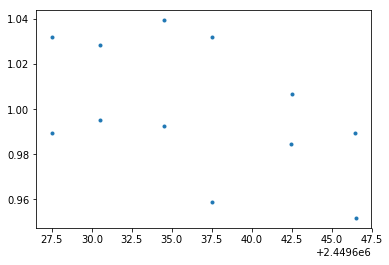

In [14]:
plt.plot(tsmall, fsmall, '.')
plt.show()

In [45]:
def subsample(time, flux, flux_err=None, npoints=100, kind="random",
              time_unit="days", night_length=8.0, seed=42,
              sigma=0.0, mean_flux=0.0, dnights=[3,6]):
    if seed is not None:
        np.random.seed(seed)

    if kind == "random":
        # generate a random list of indices for sub-sampling
        idx = np.random.choice(np.arange(0, time.shape[0], 1, dtype=int),size=npoints, replace=False)

        tsmall = time[np.sort(idx)]
        fsmall = flux[np.sort(idx)]
        if flux_err is not None:
            ferrsmall = flux_err[np.sort(idx)]
        else:
            ferrsmall = np.zeros_like(fsmall) + sigma

    elif kind == "telescope":
        # if time unit is in days, convert length of night and day
        # from hours into days
        if time_unit == "days":
            night_length /= 24.0
            tseg = time[-1] - time[0] # total length of the time series
        else:
            tseg = (time[-1] - time[0]) / 24.0

        nightly_points = int(npoints/tseg)

        tstart = time[0]
        tend = tstart + night_length

        tsmall = []
        fsmall = []

        ferrsmall = []
        while tend <= time[-1]:
            min_ind = time.searchsorted(tstart)
            max_ind = time.searchsorted(tend)

            tshort = time[min_ind:max_ind]
            fshort = flux[min_ind:max_ind]


            idx = np.random.choice(np.arange(0, tshort.shape[0], 1, dtype=int),
                           size=nightly_points, replace=False)

            tsample = tshort[np.sort(idx)]
            fsample = fshort[np.sort(idx)]

            tsmall.append(tsample)
            fsmall.append(fsample)

            if flux_err is not None:
                ferrshort = flux_err[min_ind:max_ind]
                ferrsample = ferrshort[np.sort(idx)]
                ferrsmall.append(ferrsample)
            else:
                ferrsmall.append(np.zeros_like(fsample) + sigma)

            if time_unit == "days":
                tstart += 1.0
                tend += 1.0
            elif time_unit == "hours":
                tstart += 24.0
                tend += 24.0

    elif kind == "sparse":
        if time_unit == "days":
            night_length /= 24.0
            tseg = time[-1] - time[0] # total length of the time series
        else:
            tseg = (time[-1] - time[0]) / 24.0

        tstart = time[0]
        tend = tstart + night_length

        tsmall = []
        fsmall = []

        ferrsmall = []

        start_id = np.random.randint(0, 8, size=1)

        # one minute in fractions of days
        dt = 1./(60*24.)

        # start within the 24-minute interval of observing different asteroids
        tstart += start_id*(3*dt)

        while tend <= time[-1]:

            while tstart <= tend:
                for j in range(3):
                    tind = time.searchsorted(tstart)
                    tsmall.append(time[tind])
                    fsmall.append(flux[tind])

                    if flux_err is not None:
                        ferrsmall.append(flux_err[tind])
                    else:
                        ferrsmall.append(sigma)

                    tstart += dt

                tstart += 21.*dt

            if time_unit == "days":
                tstart += (1.0-night_length)
                tend += 1.0
            elif time_unit == "hours":
                tstart += (24.0 - night_length)
                tend += 24.0
                
    elif kind == "ztf":

        tstart = time[0]
        total_nights = time[-1] - time[0]

        tsmall = []
        fsmall = []

        nnights = int(npoints/2.)
        if nnights > total_nights:
            raise ValueError("Number of selected nights is longer than total light curve.")

        dnights = np.random.randint(dnights[0], dnights[1], size=npoints)
        dnights[1::2] = 0
        nights = np.zeros(npoints, float) + dnights
        nights = nights.cumsum()

        if np.max(nights) > time[-1]:
            print("Warning! The requested observations are spread over more nights" +
                  " than we currently have data for! Actual number of nights will be smaller!")

        # After 1 month, given field rises 2 hours earlier
        # Let's say we start @ +/- 1 hour of midnight
        start_times = (np.random.random(npoints) * 2.0 - 1.0) * 60.0
        start_times[::2] = start_times[1::2]
        dtimes = np.random.randint(30, 51, size=npoints)
        dtimes[::2] = 0
        times = nights + (start_times  + dtimes) / 60.0 /  24.0 + (nights * -2./24./30.)

        ferrsmall = []
        times += tstart

        for t in times:
            t_ind = time.searchsorted(t)
            tsmall.append(time[t_ind])
            fsmall.append(flux[t_ind])

            if flux_err is not None:
                ferrsmall.append(flux_err[t_ind])
            else:
                ferrsmall.append(sigma)

    fsmall = np.random.normal(np.hstack(fsmall), scale=np.hstack(ferrsmall)) + mean_flux

    #print('tsmall: ' + str(type(tsmall)))

    #return tsmall, fsmall, ferrsmall

    return np.hstack(tsmall), np.hstack(fsmall), np.hstack(ferrsmall)


In [21]:
for j in range(3):
    print(j)

0
1
2
